# Example Usage of racer<sup>TS<sup>

### Imports

In [41]:
from racerts import ConformerGenerator
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem

### Example Transition State: Cyclization

In [42]:
file_name = 'ts.xyz'
charge = 0
reacting_atoms = [7,8,22]
input_smiles = ["C/[NH+]=C(OC)/c1ccccc1.COS(=O)(=O)[O-]"]

In [43]:
cg = ConformerGenerator()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

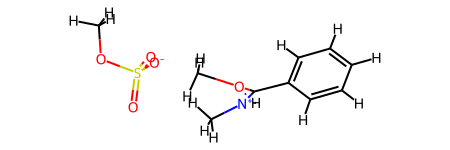

In [44]:
mol = cg.get_mol(file_name, charge, reacting_atoms, input_smiles)
IPythonConsole.ipython_3d = True
mol

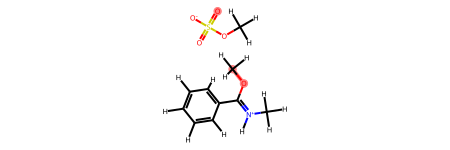

In [45]:
IPythonConsole.ipython_3d = False
mol.RemoveAllConformers()
mol.__sssAtoms = reacting_atoms
mol.__sssQry = None
mol

### Transition state conformer generation

In [46]:
ts_conformers_mol = cg.generate_conformers(file_name=file_name, charge = charge, reacting_atoms=reacting_atoms, input_smiles=input_smiles)
ts_conformers_mol.GetNumConformers()

Energy pruning reduced conformer number from 180 to 153


18

In [47]:
from racerts.visualizer import drawit
drawit(ts_conformers_mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Exploring Options

In [48]:
from racerts.mol_getter import MolGetterBonds, MolGetterConnectivity, MolGetterSMILES

cg.mol_getter = MolGetterBonds(
    assignBonds = True, 
    allowChargedFragments = True,
)
cg.mol_getter = MolGetterConnectivity()
cg.mol_getter = MolGetterSMILES()


In [49]:
from racerts.embedder import BoundsMatrixEmbedder, CmapEmbedder

cg.embedder = BoundsMatrixEmbedder(
    verbose = False,
    randomSeed = 12,
    remove_all_conformers = True,
    ETversion = 2,
    useRandomCoords = True,
)
cg.embedder = CmapEmbedder(
    verbose = False,
    randomSeed = 12,
    pruneRmsThresh = -1,
    remove_all_conformers = True,
    ETversion = 2,
    useRandomCoords = True,
)

In [50]:
from racerts.optimizer import MMFFOptimizer, UFFOptimizer

cg.optimizer = MMFFOptimizer(
    verbose = False,
    conf_id_ref= -1,
    force_constant=1000000,
)
cg.optimizer = UFFOptimizer(
    verbose = False,
    conf_id_ref= -1,
    force_constant=1000000,
)

In [51]:
from racerts.pruner import EnergyPruner, RMSDPruner

cg.energy_pruner = EnergyPruner(
    threshold = 6.0, 
    verbose = False,
)

cg.rmsd_pruner = RMSDPruner(
    threshold=0.125,
    verbose=False
)

Using mol based on DetermineBonds.


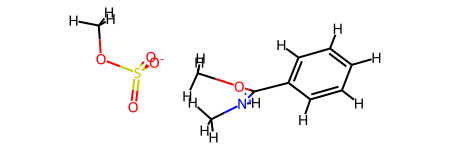

In [52]:
ts_conformers_mol = cg.get_mol(file_name=file_name, charge = charge, reacting_atoms=reacting_atoms)
ts_conformers_mol

In [53]:
cg.embedder.pruneRmsThresh = -1
ts_conformers_mol = cg.generate_conformers(file_name=file_name, charge = charge, reacting_atoms=reacting_atoms)
ts_conformers_mol.GetNumConformers()

Using mol based on DetermineBonds.
Energy pruning reduced conformer number from 180 to 32


15